#Bidirectional and Auto-Regressive Transformer

1- labeled data-set [task specified], I chose encoder-decoder pre-trained summarization model (BART-the bart-large) to summarize text with abstractive manner not exractive one.

2-creating a summarization pipeline using the huggingface pipeline API where it handles tokenization

3-loading the model and the tokenizer

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install --upgrade urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#imports
from datasets import load_dataset
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import pandas as pd
from transformers import DataCollatorForSeq2Seq
from transformers import TrainingArguments, Trainer

In [ ]:
dataset=load_dataset("Pravincoder/CNN_News")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


dataset.csv:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'article', 'highlights'],
        num_rows: 287113
    })
})

In [ ]:
train_data = dataset['train']

In [ ]:
split_dataset = train_data.train_test_split(test_size=0.2, seed=42)

In [ ]:
train_set = split_dataset['train']
test_set = split_dataset['test']

In [ ]:
input_text=train_set[1]['article']

In [ ]:
#not fine tuned BART version:
pipe=pipeline('summarization', model='facebook/bart-large')
pipe_out=pipe(input_text)

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
pipe_out[0]

{'summary_text': 'By . Chris Greenwood, Francesca Infante and Steve Nolan . PUBLISHED: . 05:15 EST, 2 August 2013 . | . UPDATED: . 15:40 EST, 6:00 EST, 3 August 2013 | . . . By . . , . . and by . ., . , and . . by . , , and by. . Sorry we are unable to accept comments for legal reasons. Murder probe: Miss Africa model Linah Keza was found stabbed to death at an address in Leyton . Tributes have been paid to the young mother, who was born in Uganda before moving'}

In [ ]:
len(input_text)

3587

In [ ]:
len(pipe_out[0]['summary_text'])

447

In [ ]:
summaries={}
summaries['bart']=pipe_out[0]['summary_text']

In [ ]:
#fine-tuning it on samsum dataset- a dataset with abstractive dialogue summaries prepared by samsung
samsum_dataset=load_dataset("Samsung/samsum")

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

The repository for Samsung/samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Samsung/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
#device='cuda'
model_ckpt='facebook/bart-large'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)
model=AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

In [ ]:
samsum_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
samsum_dataset['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
#how much tokenization length is their?
dialogue_len=[len(x['dialogue'].split()) for x in samsum_dataset['train']]
summary_len=[len(x['summary'].split()) for x in samsum_dataset['train']]
print(f'max dialogue length: {max(dialogue_len)}')
print(f'max summary length: {max(summary_len)}')

max dialogue length: 803
max summary length: 64


array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

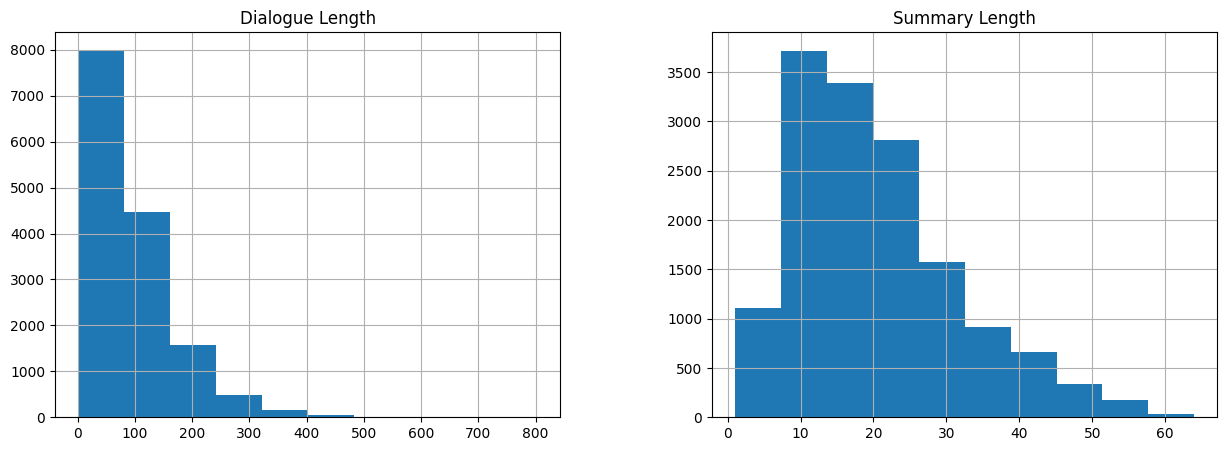

In [ ]:
data=pd.DataFrame([dialogue_len,summary_len]).T
data.columns=['Dialogue Length','Summary Length']
data.hist(figsize=(15,5))

Minimum token support from any transformer model is 512

-> Max number of tokens for dialogue length is less than 500,

-> Max number of tokens for summary length is less than 70

In [ ]:
#tokenization:
def get_feature(batch):
  encodings=tokenizer(batch['dialogue'], text_target=batch['summary'], max_length=512, truncation=True) #1024
  encodings={'input_ids':encodings['input_ids'], 'attention_mask':encodings['attention_mask'],
             'labels':encodings['labels']}
  return encodings

In [ ]:
samsum=samsum_dataset.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
samsum

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [ ]:
samsum_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
#formatting input and output sequence
columns=['input_ids','attention_mask','labels'] #the pytorch tensor
samsum.set_format(type='torch',columns=columns)

In [ ]:
#tokenizer(samsum['train'][0]['dialogue'])

In [ ]:
#data collater, is it necessary? it is where you prepare your data for finetuning to get your data trained
collator=DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
#trainer:
training_args=TrainingArguments(
    output_dir='bart__samsum',
    run_name='bart_samsum_experiment',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4, #the 4 batches will be used for eval
    weight_decay=0.01, #learning rate, the wait decay is 0.01
    logging_steps=10,
    #evaluation_strategy='steps', #runs in wandb
    eval_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16, #as i am using a small GPU
    #predict_with_generate=True
)
trainer=Trainer(
    model=model,
    args=training_args,
    #tokenizer=tokenizer,
    processing_class=tokenizer,
    data_collator=collator,
    #train_dataset=tokenized_dataset['train'],
    #eval_dataset=tokenized_dataset['validation']
    train_dataset=samsum['train'],
    eval_dataset=samsum['validation']
)
trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: solvingpoll (solvingpoll-idk) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:740: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss,Validation Loss


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2810: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=230, training_loss=1.8332786186881687, metrics={'train_runtime': 1919.7263, 'train_samples_per_second': 7.674, 'train_steps_per_second': 0.12, 'total_flos': 8683156412792832.0, 'train_loss': 1.8332786186881687, 'epoch': 0.9991854466467553})

In [ ]:
#using rouge for evaluation:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode predictions and labels
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Calculate exact match accuracy
    exact_matches = [pred == label for pred, label in zip(decoded_preds, decoded_labels)]
    accuracy = sum(exact_matches) / len(exact_matches)
    return {"accuracy": accuracy}

In [ ]:
test_results = trainer.evaluate(samsum['test'])
print(test_results)

{'eval_loss': 1.427167534828186, 'eval_runtime': 36.5861, 'eval_samples_per_second': 22.386, 'eval_steps_per_second': 5.603, 'epoch': 0.9991854466467553}


In [ ]:
predictions = trainer.predict(samsum['validation'])

# Extract predictions and labels
preds = predictions.predictions  # Model's raw predictions (logits or token IDs)
labels = predictions.label_ids   # Ground truth labels

# Decode predictions and labels
decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

# Calculate exact match accuracy
exact_matches = [pred == label for pred, label in zip(decoded_preds, decoded_labels)]
accuracy = sum(exact_matches) / len(exact_matches)

print(f"Exact Match Accuracy: {accuracy * 100:.2f}%")

OutOfMemoryError: CUDA out of memory. Tried to allocate 456.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 444.12 MiB is free. Process 3407 has 14.30 GiB memory in use. Of the allocated memory 13.07 GiB is allocated by PyTorch, and 1.10 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
trainer.save_model('bart_samsum_model')

In [ ]:
pipe=pipeline('summarization',model='bart_samsum_model')
gen={'length_penalty':0.8,'num_beams':8, "max_length":128}
dialogue="""
mk: what are you planning to work on today mariam?
mariam: i am going to work on my assignment
mk: cool. is there anything else you would like to do?
mariam: yeah i might go on a trip next fridaay so i am calling friends, slay
mk: great, talk to me once you get back, have a good time bestie
"""
print(pipe(dialogue,**gen))

Device set to use cuda:0
Your max_length is set to 128, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


[{'summary_text': 'Mariam is going to work on her assignment today. She might go on a trip next friday.'}]
